In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data_daily.csv")
df = df.rename(columns={"# Date": "date", "Receipt_Count": "receipt"})
details = df.describe()
details

,receipt
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [3]:
df["date"] = pd.to_datetime(df["date"], yearfirst=True)
mean = details['receipt']['mean']
std = details['receipt']['std']

Text(0, 0.5, 'Num Receipt')

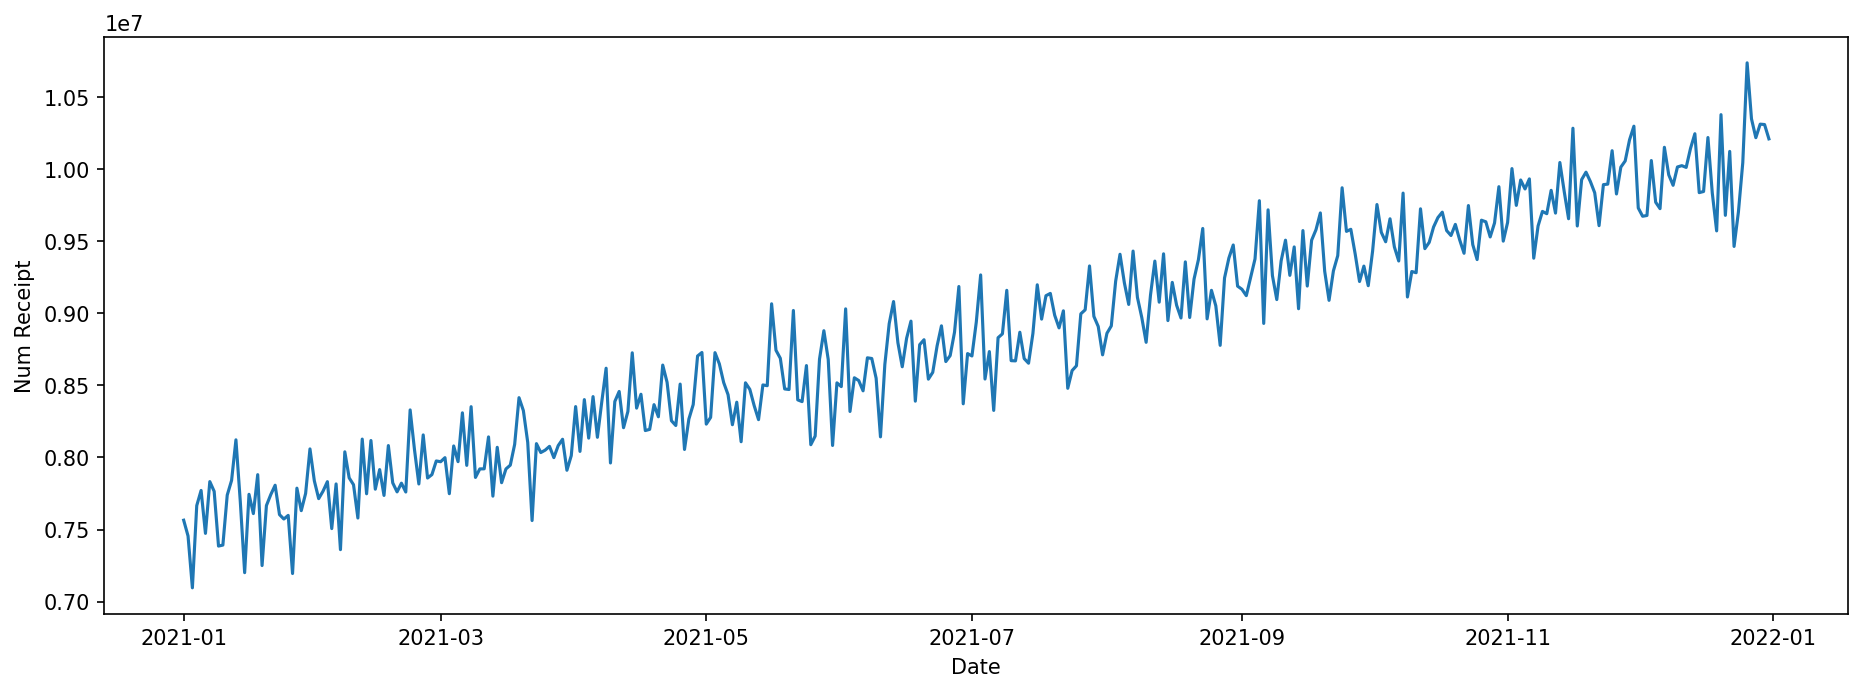

In [4]:
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(df["date"], df["receipt"])
plt.xlabel("Date")
plt.ylabel("Num Receipt")

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter
df

,date,receipt,year,month,day,day_of_year,quarter
0,2021-01-01,7564766,2021,1,1,1,1
1,2021-01-02,7455524,2021,1,2,2,1
2,2021-01-03,7095414,2021,1,3,3,1
3,2021-01-04,7666163,2021,1,4,4,1
4,2021-01-05,7771289,2021,1,5,5,1
...,...,...,...,...,...,...,...
360,2021-12-27,10350408,2021,12,27,361,4
361,2021-12-28,10219445,2021,12,28,362,4
362,2021-12-29,10313337,2021,12,29,363,4
363,2021-12-30,10310644,2021,12,30,364,4


Text(0, 0.5, 'Num Monthly Receipts')

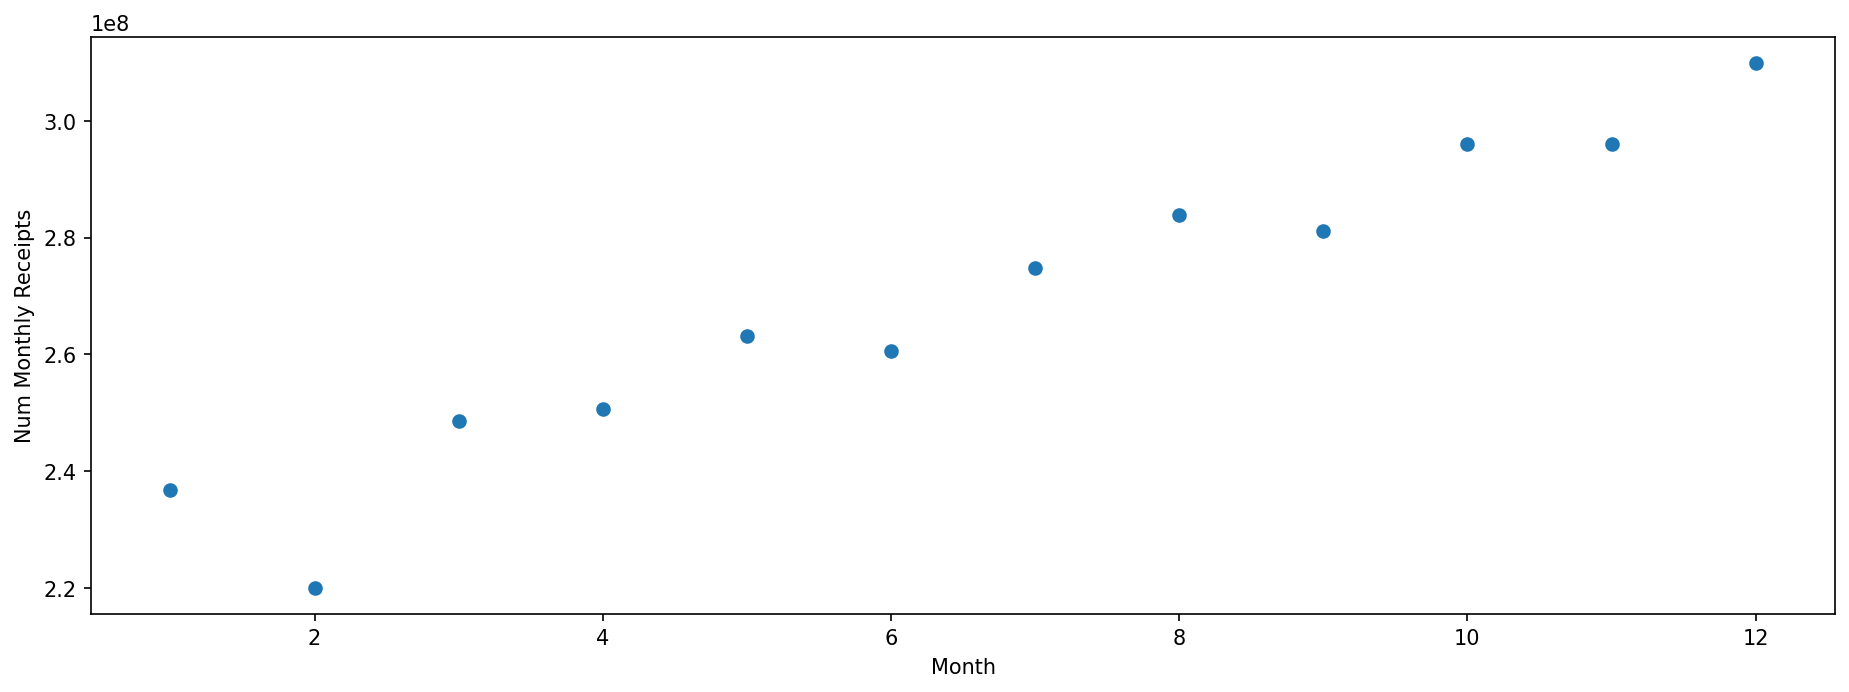

In [6]:
monthly = df.groupby('month')["receipt"].sum().reset_index()
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(monthly['month'], monthly["receipt"])
plt.xlabel("Month")
plt.ylabel("Num Monthly Receipts")

In [7]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df

,date,receipt,year,month,day,day_of_year,quarter,month_sin,month_cos
0,2021-01-01,7564766,2021,1,1,1,1,5.000000e-01,0.866025
1,2021-01-02,7455524,2021,1,2,2,1,5.000000e-01,0.866025
2,2021-01-03,7095414,2021,1,3,3,1,5.000000e-01,0.866025
3,2021-01-04,7666163,2021,1,4,4,1,5.000000e-01,0.866025
4,2021-01-05,7771289,2021,1,5,5,1,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...
360,2021-12-27,10350408,2021,12,27,361,4,-2.449294e-16,1.000000
361,2021-12-28,10219445,2021,12,28,362,4,-2.449294e-16,1.000000
362,2021-12-29,10313337,2021,12,29,363,4,-2.449294e-16,1.000000
363,2021-12-30,10310644,2021,12,30,364,4,-2.449294e-16,1.000000


Text(0, 0.5, 'Num Receipt')

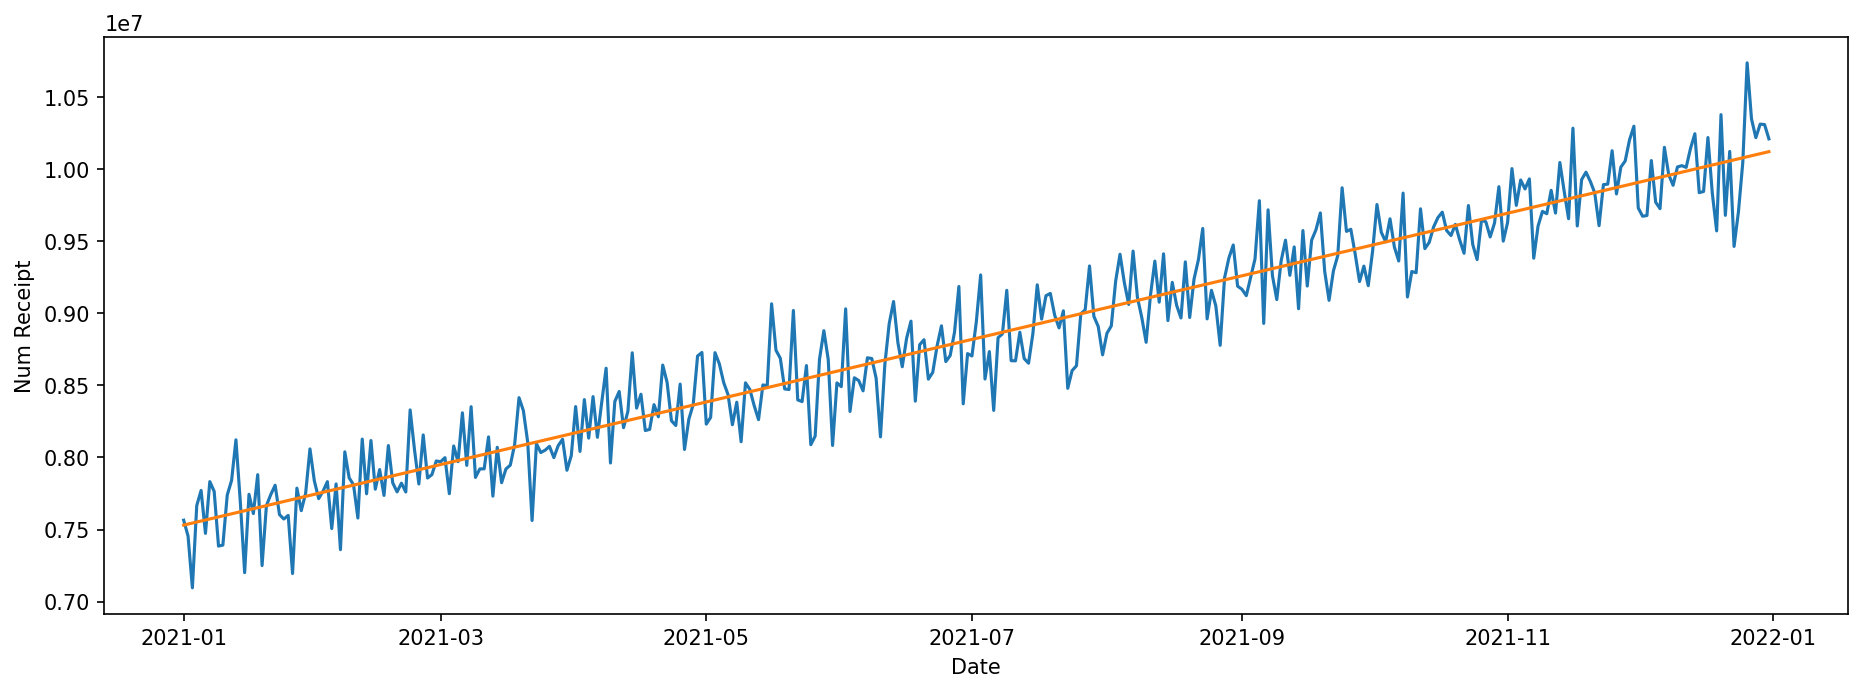

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(365).reshape(-1, 1), df['receipt'])
pred = model.predict(np.arange(365).reshape(-1, 1))
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(df["date"], df["receipt"])
plt.plot(df["date"], pred)
plt.xlabel("Date")
plt.ylabel("Num Receipt")

Text(0, 0.5, 'Num Receipt')

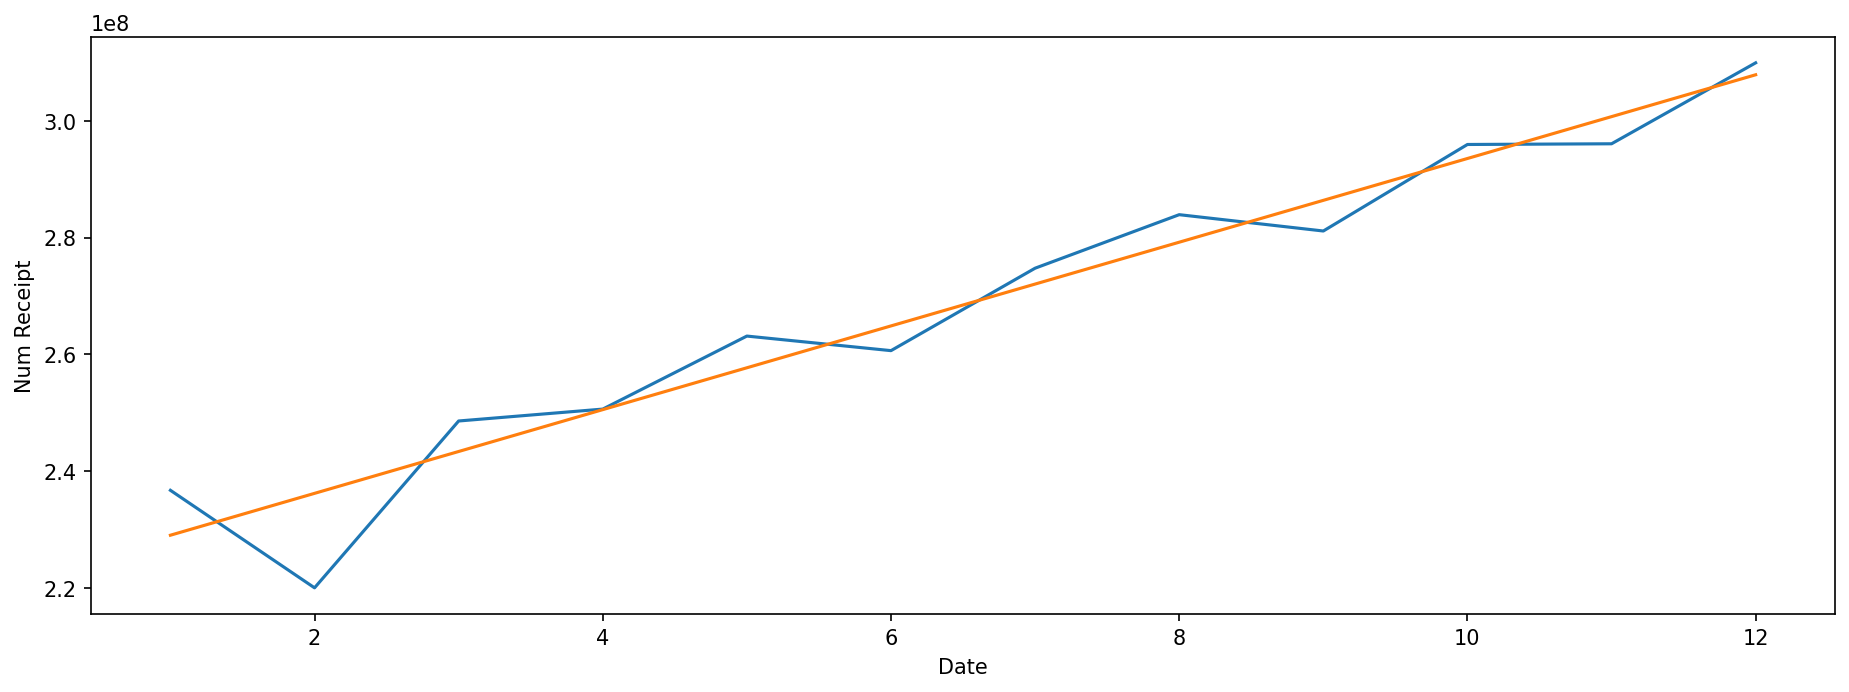

In [11]:
model = LinearRegression()
model.fit(np.arange(12).reshape(-1, 1), monthly['receipt'])
pred = model.predict(np.arange(12).reshape(-1, 1))
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(monthly['month'], monthly["receipt"])
plt.plot(monthly['month'], pred)
plt.xlabel("Date")
plt.ylabel("Num Receipt")